<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('data/credit_train.csv')
credit_test = pd.read_csv('data/credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

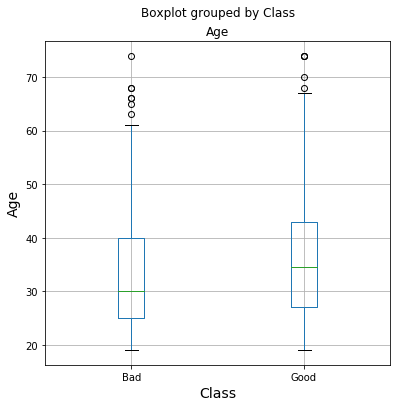

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
fig, ax = plt.subplots(figsize=(6,6))
credit_train.boxplot(column='Age', by='Class', ax=ax)
ax.set_ylabel('Age', size=14)
ax.set_xlabel('Class', size=14)
plt.show()

# Comment whether age is a good predictor
# Age, by itself, does not appear to be a good predictor of credit worthiness. There is no single horizontal line (age) that
# clearly separates the two classes (Good vs Bad).

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [4]:
# Command:
z = credit_train.groupby(['CreditHistory.Critical', 'Class']).size().reset_index()
z.columns = ['CreditHistory.Critical', 'Class', 'Size']
z = z.pivot(index='CreditHistory.Critical', columns='Class', values='Size')#.reset_index()
z.loc[:, 'GoodOverBad'] = z['Good'] * 1./z['Bad']
z

# One sentence summary:
# A person with critical credit history (CreditHistory.Critical = 1) is more credit worth (Class = Good). There are nearly
# 5 times more Good than Bad for a person with critical credit, as compared to 1.8 times more Good than Bad for a person without
# critical credit.

Class,Bad,Good,GoodOverBad
CreditHistory.Critical,,,
0,208,373,1.793269
1,38,189,4.973684


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [5]:
credit_train.loc[:, 'ClassBinary'] = credit_train['Class'].apply(lambda x: 1 if x=='Good' else 0)
credit_test.loc[:, 'ClassBinary'] = credit_test['Class'].apply(lambda x: 1 if x=='Good' else 0)

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [6]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

features = [i for i in list(credit_train.columns.values) if i not in ['Class', 'ClassBinary']]

x_train = credit_train[features].values
y_train = credit_train['ClassBinary'].values

lr_model = logit.fit(x_train, y_train)

y_train_pred_lr = lr_model.predict(x_train)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print("Performance on the training set:")
print("\n Confusion matrix:\n", confusion_matrix(y_train, y_train_pred_lr))  
print("\n Classification report:\n", classification_report(y_train, y_train_pred_lr))
print("\n Accuracy score on training set = %.3f" % (accuracy_score(y_train, y_train_pred_lr)))

Performance on the training set:

 Confusion matrix:
 [[117 129]
 [ 53 509]]

 Classification report:
              precision    recall  f1-score   support

          0       0.69      0.48      0.56       246
          1       0.80      0.91      0.85       562

avg / total       0.76      0.77      0.76       808


 Accuracy score on training set = 0.775


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [8]:
x_test = credit_test[features].values
y_test = credit_test['ClassBinary'].values

y_pred_lr = lr_model.predict(x_test)

print("Performance on the test set:")
print("\n Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))  
print("\n Classification report:\n", classification_report(y_test, y_pred_lr))

Performance on the test set:

 Confusion matrix:
 [[ 18  36]
 [ 23 115]]

 Classification report:
              precision    recall  f1-score   support

          0       0.44      0.33      0.38        54
          1       0.76      0.83      0.80       138

avg / total       0.67      0.69      0.68       192



<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [9]:
# Command that outputs acccuracy
print("Accuracy score of logistic regression model on test set = %.3f" % (accuracy_score(y_test, y_pred_lr)))

Accuracy score of logistic regression model on test set = 0.693


<h3>Q.7. Generate the ROC curve.</h3>

In [10]:
from sklearn.metrics import roc_curve, auc

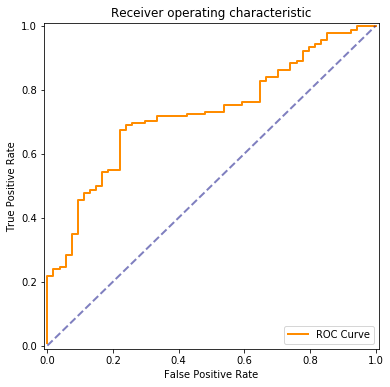

In [12]:
y_scores_lr = lr_model.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_scores_lr)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(6,6))

lw = 2
ax.plot(fpr, tpr, color='darkorange', lw=lw, label="ROC Curve")
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [13]:
# Command(s):
roc_auc = auc(fpr, tpr)
print("The ROC AUC of the logistic regression model on the test data = %.3f" % (roc_auc))

The ROC AUC of the logistic regression model on the test data = 0.726


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda_model = lda.fit(x_train, y_train)

y_train_pred = lda_model.predict(x_train)

print("Performance on the training set:")
print("\n Confusion matrix:\n", confusion_matrix(y_train, y_train_pred))  
print("\n Classification report:\n", classification_report(y_train, y_train_pred))
print("\n Accuracy score on the train set = %.3f" % (accuracy_score(y_train, y_train_pred)))

Performance on the training set:

 Confusion matrix:
 [[124 122]
 [ 59 503]]

 Classification report:
              precision    recall  f1-score   support

          0       0.68      0.50      0.58       246
          1       0.80      0.90      0.85       562

avg / total       0.77      0.78      0.77       808


 Accuracy score on the train set = 0.776


<h3>Q.10. What is the accuracy of the new model?</h3>

In [15]:
y_pred_lda = lda_model.predict(x_test)
print("Accuracy score of LDA model on the test set = %.3f" % (accuracy_score(y_test, y_pred_lda)))

Accuracy score of LDA model on the test set = 0.688


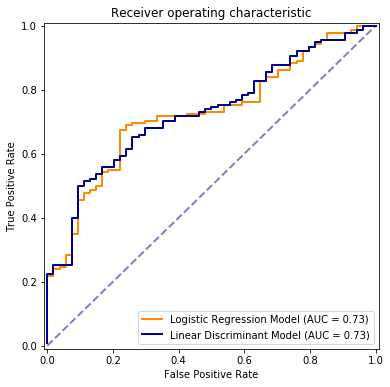

In [16]:
y_scores_lr  = lr_model.decision_function(x_test)
y_scores_lda = lda_model.decision_function(x_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_scores_lda)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)

fig, ax = plt.subplots(figsize=(6,6))

lw = 2
ax.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label="Logistic Regression Model (AUC = %.2f)" % (roc_auc_lr))
ax.plot(fpr_lda, tpr_lda, color='darkblue', lw=lw, label="Linear Discriminant Model (AUC = %.2f)" % (roc_auc_lda))
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
ax.set_xlim([-0.01, 1.01])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
leg = ax.legend(loc="lower right")
plt.show()